In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
rootFolder = "/home/giangtm/Work/Projects/DataScience/dataset/"
print(check_output(["ls", rootFolder]).decode("utf8"))

eng-daily-01012012-12312012.csv
eng-daily-01012017-12312017.csv
eng-daily-01012017-12312017_custom.csv
eng-hourly-03012012-03312012.csv
eng-hourly-08012017-08312017.csv
Project_Scheduling_2.csv
Project_Scheduling.csv
Project_Scheduling.glu
Project_Speed_Data.csv



In [2]:
d=pd.read_csv(rootFolder + "Project_Speed_Data.csv")
d.head()

,project_id,project_name,project_type,form_name,step,real_speed,estimate_speed,different
0,59a7b1aefc13ae54a500051e,000_151130_SAGA_504967,Mailrespone,Form_2,Rework,175.48,106.99,-64.02
1,59a7b1aefc13ae54a500051f,000_151130_testset,Mailrespone,Form_1,Rework,56.96,185.16,69.24
2,59a7b1aefc13ae54a5000520,001_090106_Juris_V_00473_CuR_GewArch_WuM,CustomProgram,Form_2,Capture,361.62,81.72,-342.51
3,59a7b1aefc13ae54a5000521,001_120207_ARAG_Questionare_Test_project,Mailrespone,Form_2,Capture,307.41,69.56,-341.94
4,59a7b1aefc13ae54a5000522,001_130102_Scanpoint_ÖAMTC_Fragebogenauslesung,CustomProgram,Form_3,Classify,97.51,83.30,-17.06


In [3]:
d.describe()

,real_speed,estimate_speed,different
count,1000.000000,1000.000000,1000.000000
mean,212.322550,125.379410,-97.260100
std,105.375602,43.402355,136.520601
min,30.540000,50.050000,-661.730000
25%,122.757500,86.485000,-155.285000
50%,211.730000,126.825000,-68.050000
75%,303.102500,162.760000,3.560000
max,399.860000,199.790000,82.030000


In [5]:
is_greater_20 = d['different'] > 20
is_speed_greater_200 = d['real_speed'] > 100
analysis_data = d[is_greater_20 & is_speed_greater_200]
analysis_data[:10]

,project_id,project_name,project_type,form_name,step,real_speed,estimate_speed,different
93,59a7b1aefc13ae54a500057b,008_110115_SDS_HealthcareClaim,Mailrespone,Form_2,Capture,118.21,176.13,32.88
101,59a7b1aefc13ae54a5000583,008_170120_Ancestry_46487_DE_Magdeburg_D,Type_Proof,Form_2,Classify,145.31,186.85,22.23
131,59a7b1aefc13ae54a50005a1,010_170222_002_BarcodeKontrollTool,Other Model,Form_2,Capture,122.84,188.09,34.69
197,59a7b1aefc13ae54a50005e3,015_150122_FR_007_MNK_NK3_GOA,Other Model,Form_3,Capture,128.90,196.18,34.30
220,59a7b1affc13ae54a50005fa,017_110303_04311_SAGA_OCR_Friseurkunden,CustomProgram,Form_2,Rework,114.29,177.51,35.61
243,59a7b1affc13ae54a5000611,018_170307_002_505275,Mailrespone,Form_1,Classify,118.99,149.78,20.56
254,59a7b1affc13ae54a500061c,019_160202_Ancestry_46630_Berlin_BMD_Part5a,Type_Proof,Form_2,Rework,115.04,164.79,30.19
288,59a7b1affc13ae54a500063e,022_120216_SAGA_503529,Other Model,Form_2,Capture,134.73,188.64,28.58
319,59a7b1affc13ae54a500065d,024_160303_Ancestry_45784_DE_Register_for_qc,Mailrespone,Form_2,Classify,100.19,131.49,23.80
320,59a7b1affc13ae54a500065e,024_160303_SAGA_505040,Other Model,Form_1,Rework,106.96,145.16,26.32


In [6]:
analysis_data.describe()

,real_speed,estimate_speed,different
count,38.000000,38.000000,38.000000
mean,119.341842,173.017368,30.675526
std,14.440047,18.143796,7.755529
min,100.060000,130.630000,20.410000
25%,104.005000,160.835000,23.417500
50%,119.380000,176.160000,29.955000
75%,128.360000,188.070000,34.672500
max,151.160000,196.180000,47.820000


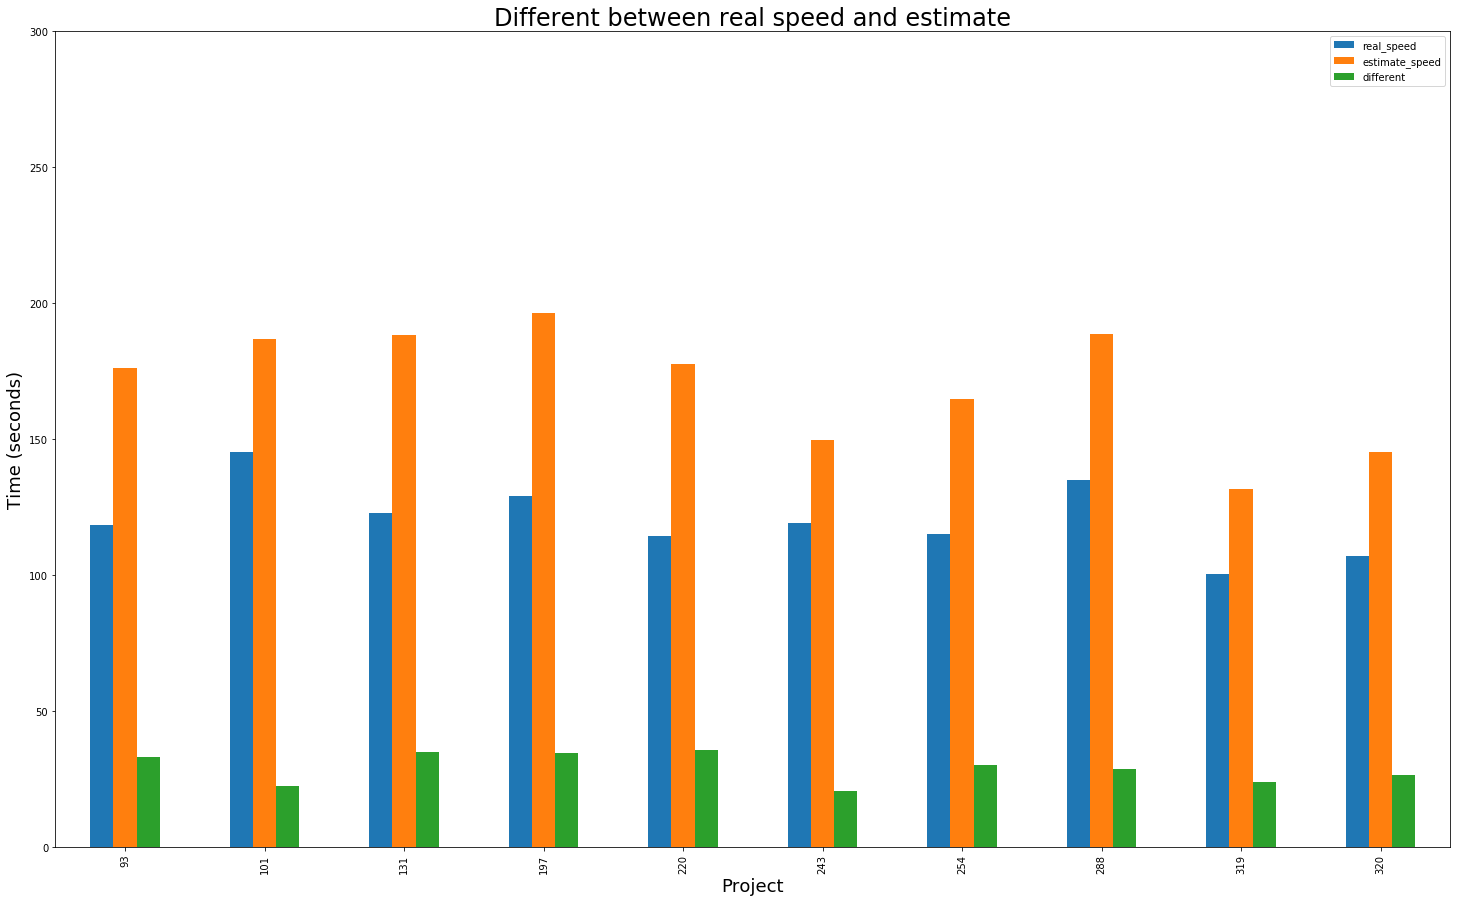

In [20]:
p = analysis_data[:10].plot(kind="bar", figsize=(25,15));
p.set_title("Different between real speed and estimate", fontsize=24);
p.set_xlabel("Project", fontsize=18);
p.set_ylabel("Time (seconds)", fontsize=18);
p.set_ylim(0,300);